In [45]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

In [46]:
abt = pd.read_csv('analytical_base_table')

In [47]:
abt.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [48]:
x = np.linspace(0,1,1000)
#noise
np.random.seed(555)
noise = np.random.uniform(-0.02,0.02,1000)
y = ((x+noise)>0.97).astype(int)
X = x.reshape(1000,1)

In [49]:
print(y.mean())

0.029


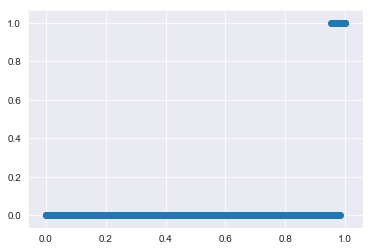

In [50]:
plt.scatter(X,y)
plt.show()

In [51]:
pred_dumb = [0] * len(y)

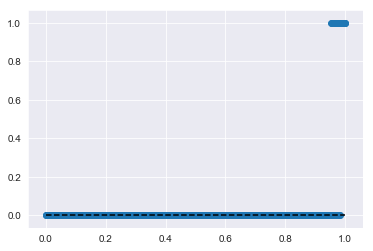

In [52]:
plt.scatter(X,y)
plt.plot(X,pred_dumb,'k--')
plt.show()

In [53]:
clf = LogisticRegression(random_state =123,C =10)
clf.fit(X,y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
pred_class = clf.predict(X)
pred = clf.predict_proba(X)
pred = [p[1] for p in pred]

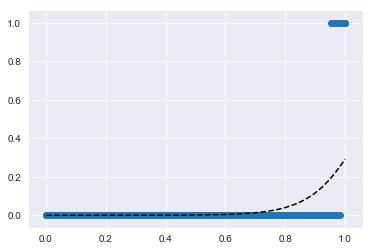

In [55]:
plt.scatter(X,y)
plt.plot(X,pred,'k--')
plt.show()

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
print('Dumb Model Acc:',accuracy_score(y,pred_dumb))
print('Logistic Reg Acc:',accuracy_score(y,pred_class))

Dumb Model Acc: 0.971
Logistic Reg Acc: 0.971


In [58]:
all(pred_dumb == pred_class)

True

In [59]:
print(confusion_matrix(y,pred_class))

[[971   0]
 [ 29   0]]


In [60]:
cm = confusion_matrix(y,pred_class)

tp = cm[1][1]
fp= cm[0][1]
tn = cm[0][0]
fn = cm[1][0]
true_positive_rate =tp/(tp+fn)
print('TPR:',true_positive_rate)
false_positive_rate =fp/(fp+tn)
print('FPR:',false_positive_rate)


TPR: 0.0
FPR: 0.0


In [61]:
print(np.round(pred[-10:],2))

[0.27 0.27 0.28 0.28 0.28 0.28 0.28 0.29 0.29 0.29]


In [62]:
print(pred_class[-10:])

[0 0 0 0 0 0 0 0 0 0]


In [63]:
pred_class_v2 = (np.array(pred) > 0.25).astype(int)

In [64]:
print(confusion_matrix(y,pred_class_v2))

[[970   1]
 [ 11  18]]


In [65]:
cm_v2 = confusion_matrix(y,pred_class_v2)

tp_v2 = cm_v2[1][1]
fp_v2= cm_v2[0][1]
tn_v2 = cm_v2[0][0]
fn_v2 = cm_v2[1][0]
true_positive_rate_v2 =tp_v2/(tp_v2+fn_v2)
print('TPR(0.25 Threshold):',true_positive_rate_v2)
false_positive_rate_v2 =fp_v2/(fp_v2+tn_v2)
print('FPR(0.25 Threshold):',false_positive_rate_v2)


TPR(0.25 Threshold): 0.6206896551724138
FPR(0.25 Threshold): 0.0010298661174047373


In [66]:
fpr,tpr,thresholds = roc_curve(y,pred)

In [67]:
fpr

array([0.        , 0.        , 0.        , 0.00102987, 0.00102987,
       0.0030896 , 0.0030896 , 0.00720906, 0.00720906, 0.00823893,
       0.00823893, 0.0092688 , 0.0092688 , 0.01544799, 0.01544799,
       0.01853759, 0.01853759, 1.        ])

In [68]:
pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresholds': thresholds})

,FPR,TPR,Thresholds
0,0.000000,0.000000,1.291533
1,0.000000,0.034483,0.291533
2,0.000000,0.586207,0.255169
3,0.001030,0.586207,0.252998
4,0.001030,0.724138,0.244437
5,0.003090,0.724138,0.240231
6,0.003090,0.758621,0.238147
7,0.007209,0.758621,0.229933
8,0.007209,0.793103,0.227911
9,0.008239,0.793103,0.225902


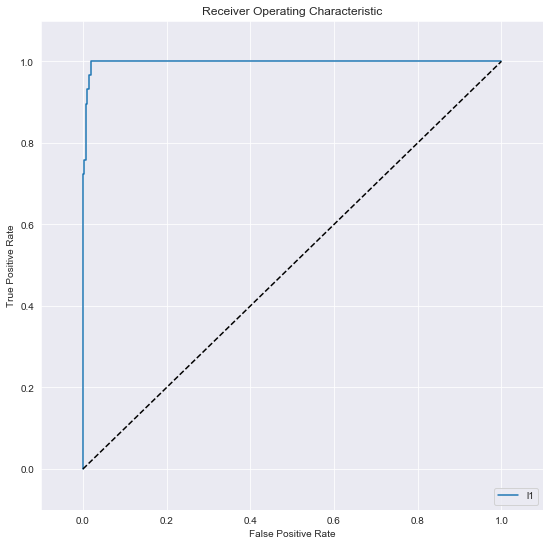

In [70]:
fig = plt.figure(figsize=(9,9))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,label='l1')
plt.legend(loc  ='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()